# Density estimation


## Introduction

- Last week we looked a Bayes decision theory
- Nice theoretically, but assumes knolwedge about probablity desnity distribution.
- This is rarely available, so how to we proceed.
- Estimate densities from data!

In this lecture we will cover
- Parametric density estimation
    - Maximum likelihood
- Non-parametric density estimation
    - Histogram approach
    - Parzen window approach
    - K nearest neighbor approach
- K nearest neighbor classifier

In [19]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, uniform, beta

---

## Parametric density estimation

### What do we mean by parametric?

- Assume that the *form* of the probablity density function is known.
- Estimate *parameters* from data

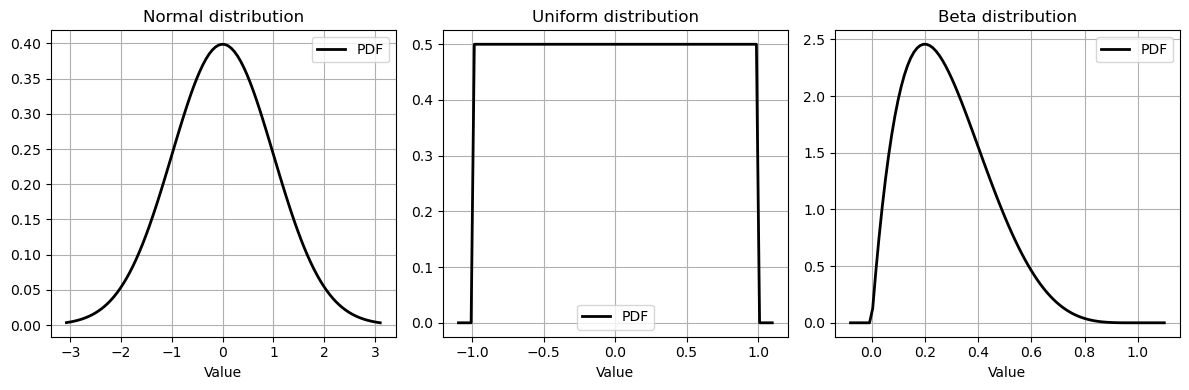

In [18]:
# Visualizing different distributions

normal_data = np.random.normal(loc=0, scale=1, size=1000)
uniform_data = np.random.uniform(low=-1, high=1, size=1000)
beta_data = np.random.beta(a=2, b=5, size=1000)
    
x_normal = np.linspace(normal_data.min()-0.1, normal_data.max()+0.1, 100)
p_normal = norm.pdf(x_normal, loc=0, scale=1)

x_uniform = np.linspace(uniform_data.min()-0.1, uniform_data.max()+0.1, 100)
p_uniform = uniform.pdf(x_uniform, loc=-1, scale=2)

x_beta = np.linspace(beta_data.min()-0.1, uniform_data.max()+0.1, 100)
p_beta = beta.pdf(x_beta, a=2, b=5)

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(x_normal, p_normal, 'k', linewidth=2, label='PDF')
plt.xlabel('Value')
plt.title('Normal distribution')
plt.legend()
plt.grid(True)
plt.subplot(132)
plt.plot(x_uniform, p_uniform, 'k', linewidth=2, label='PDF')
plt.xlabel('Value')
plt.title('Uniform distribution')
plt.legend()
plt.grid(True)
plt.subplot(133)
plt.plot(x_beta, p_beta, 'k', linewidth=2, label='PDF')
plt.xlabel('Value')
plt.title('Beta distribution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Recall:
    - Obtain *realizations* from probability density function:
        - $p(\mathbf{x}_1, \boldsymbol{\theta}) \rightarrow \mathbf{x}_1$
        - $p(\mathbf{x}_5, \boldsymbol{\theta}) \rightarrow \mathbf{x}_5$
    - Joint:
        - $p(\mathbf{x}_1, \mathbf{x}_5, \boldsymbol{\theta}) \rightarrow \mathbf{x}_1$ and $\mathbf{x}_5$
    - If independent:
        - $p(\mathbf{x}_1, \mathbf{x}_5, \boldsymbol{\theta}) = p(\mathbf{x}_1, \boldsymbol{\theta})p(\mathbf{x}_5, \boldsymbol{\theta})$

### Likelihood function

- Let $\{\mathbf{x}_1, \cdots, \mathbf{x}_N\}$ and assume independent and identically distributed random variables (iid).
- Let the set of parameters for a particular distribution form a parameter vector $\boldsymbol{\theta}$.
- The likelihood function of $\boldsymbol{\theta}$ with respect to the random variable $X$ can be expressed as:
    - $p(X; \boldsymbol{\theta})=\prod\limits_{i=1}^N p(\mathbf{x}_i; \boldsymbol{\theta})$
- Idea:
    - Find $\boldsymbol{\theta}$ that makes $X$ most probable.
- Therefore:
    - $\hat{\boldsymbol{\theta}}_{ML} = \underset{\boldsymbol{\theta}}{\operatorname{argmax}}\ p(X; \boldsymbol{\theta})$

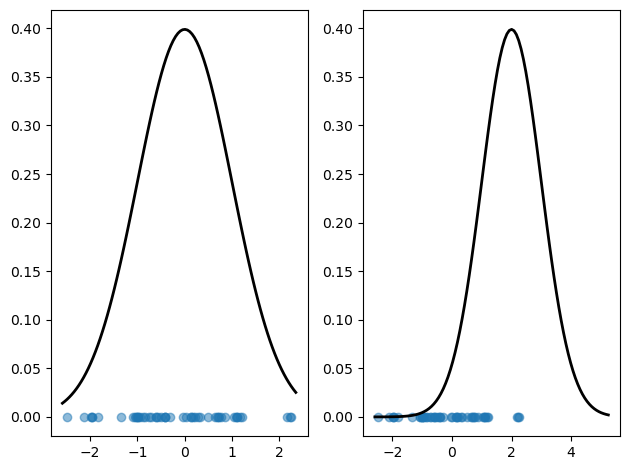

In [26]:
# What distribution fits the data?

normal_data = np.random.normal(loc=0, scale=1, size=50)

x_normal_good = np.linspace(normal_data.min()-0.1, normal_data.max()+0.1, 100)
p_normal_good = norm.pdf(x_normal_good, loc=0, scale=1)

x_normal_bad = np.linspace(normal_data.min()-0.1, normal_data.max()+3.0, 100)
p_normal_bad = norm.pdf(x_normal_bad, loc=2, scale=1)

plt.figure(1)
plt.subplot(121)
plt.scatter(normal_data, np.zeros_like(normal_data), alpha=0.5)
plt.plot(x_normal_good, p_normal_good, 'k', linewidth=2, label='PDF')
plt.subplot(122)
plt.scatter(normal_data, np.zeros_like(normal_data), alpha=0.5)
plt.plot(x_normal_bad, p_normal_bad, 'k', linewidth=2, label='PDF')
plt.tight_layout()
plt.show()

### Log-likelihood

- In most cases, we work with the log-likelihood instead of the likelihood itself.
    - Simplifies the mathematics.
    - Can be more numerically stable if we have the product of many small probabilities.
- Log-likelihood:
    - $L(\boldsymbol{\theta}) = \log \prod\limits_{i=1}^N p(\mathbf{x}_i; \boldsymbol{\theta})$
    - Remember: $\log(ab) = \log(a)+\log(b)$
- Want:
    - $\frac{\partial}{\partial \boldsymbol{\theta}} L(\boldsymbol{\theta}) = \mathbf{0}$

### Example with univariate normal

Let us consider the case of a univeriate normal distribution

- Let $\boldsymbol{\theta} = \begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix} = \begin{bmatrix} \mu \\ \sigma^2 \end{bmatrix}$.
- First - $\log \left[ p(\mathbf{x}_i; \boldsymbol{\theta}) \right]=$
- Then - $\frac{\partial}{\partial \boldsymbol{\theta}}\log \left[ p(\mathbf{x}_i; \boldsymbol{\theta}) \right]=$
- Lastly, asdf


### Example with univariate normal continued

Putting it all together gives us:

- For $\theta_1$:
    - $\hat{\theta_1} = \hat{\mu} = \frac{1}{N}\sum\limits_{k=1}^N$ x_k


Note: In many cases, we will use these estimators for mean and covariances regardless.

## Mixture models

- Nearest


## Non-parametric density estimation

- Real-world data rarely follow exact distributions.
- asdf
- look at example below

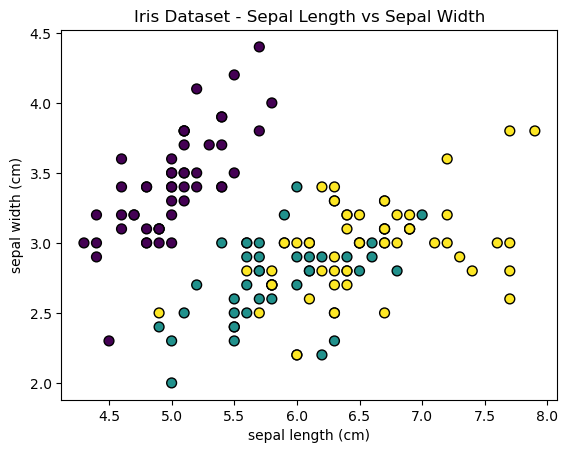

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# fetch dataset 
iris = fetch_ucirepo(id=53)
  
# data (as pandas dataframes) 
X = iris.data.features.iloc[:, :2]
X_1_name = 'sepal length (cm)'
X_2_name = 'sepal width (cm)'
y = np.zeros(150)
y[50:100] = 1
y[100:150] = 2
y_names = iris.data.targets


plt.figure(1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel(X_1_name)
plt.ylabel(X_2_name)
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.show()


### Histogram approach

- Idea:
    - Divide input into bins.
    - For each bin; estimate probablity of a sample x being in a bin.
    - This can probability can be estimated using the *frequency ratio*
        - $P \approx k_N / N$, where $N$=total number of samples and $k_N$=number of samples within bin.
    

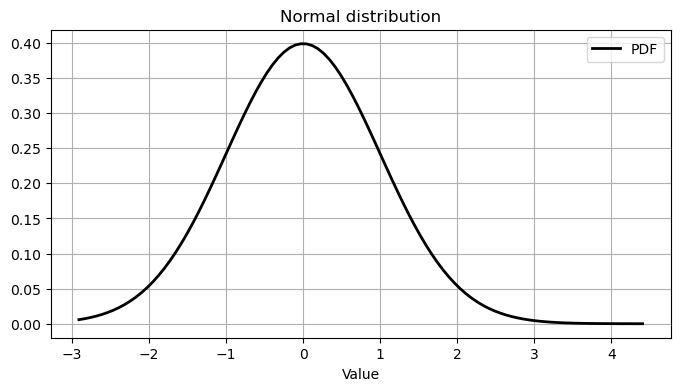

In [20]:

normal_data = np.random.normal(loc=0, scale=1, size=1000)
    
x_normal = np.linspace(normal_data.min()-0.1, normal_data.max()+0.1, 100)
p_normal = norm.pdf(x_normal, loc=0, scale=1)

plt.figure(figsize=(8, 4))
plt.plot(x_normal, p_normal, 'k', linewidth=2, label='PDF')
plt.xlabel('Value')
plt.title('Normal distribution')
plt.legend()
plt.grid(True)
plt.show()

### Alternative histogram approach

- Place bin on each sample.

### Problem with histogram approach

- Determining bin size can be difficult, especially for high-dimensional data.
- Not suitable for derivation.
    - "asdf" approximation


## Parzen windows

- Take the alternative histogram approach as a starting point.
- Replace $I$ with a *smooth* function $\phi$
- This gives:
    - asdf
- A typical choice is $N()$
    - then:
- Draw ->


### What to expect from Parzen windows

- Take the alternative histogram approach as a starting point.
- Replace $I$ with a *smooth* function $\phi$
- This gives:
    - asdf
- A typical choice is $N()$
    - then:
- Draw ->


### Remarks

- Plug ...
- Need more d

## K nearest neighbor (NN)

- Nearest


## Programming exercises

testesq

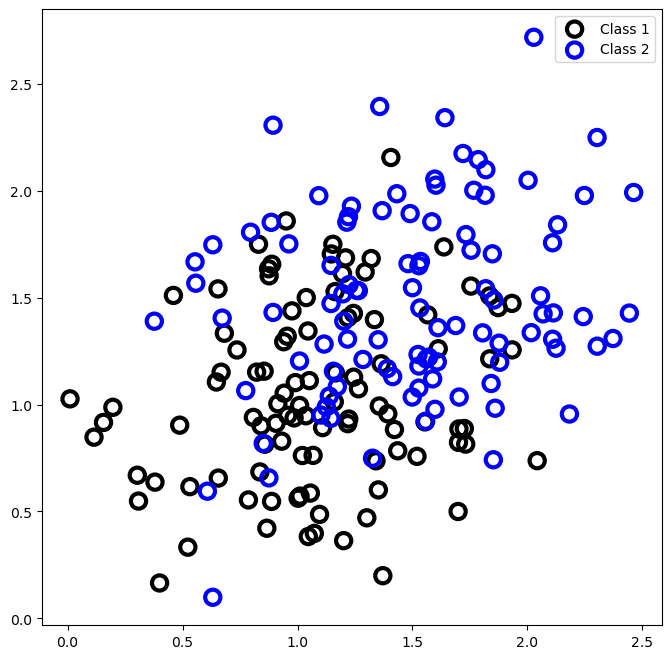

In [17]:
import numpy as np
import matplotlib.pyplot as plt

N = 100

mu1 = np.array([1, 1])
mu2 = np.array([1.5, 1.5])
sigma = np.array([[0.2, 0.0], [0.0, 0.2]])

x1 = np.random.multivariate_normal(mu1, sigma, N)
x2 = np.random.multivariate_normal(mu2, sigma, N)
x = np.concatenate((x1, x2))
y = np.concatenate((np.ones(N), np.zeros(N)))

plt.figure(1, figsize=(8, 8))
plt.scatter(x1[:, 0], x1[:, 1], s=120, facecolors='none',
            edgecolors='black', linewidth=3.0, label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], s=120, facecolors='none',
            edgecolors='blue', linewidth=3.0, label='Class 2')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100

mu1 = np.array([1, 1])
mu2 = np.array([1.5, 1.5])
sigma = np.array([[0.2, 0.0], [0.0, 0.2]])

x1 = np.random.multivariate_normal(mu1, sigma, N)
x2 = np.random.multivariate_normal(mu2, sigma, N)
x = np.concatenate((x1, x2))
y = np.concatenate((np.ones(N), np.zeros(N)))

plt.figure(1, figsize=(8, 8))
plt.scatter(x1[:, 0], x1[:, 1], s=120, facecolors='none',
            edgecolors='black', linewidth=3.0, label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], s=120, facecolors='none',
            edgecolors='blue', linewidth=3.0, label='Class 2')
plt.legend()
plt.show()

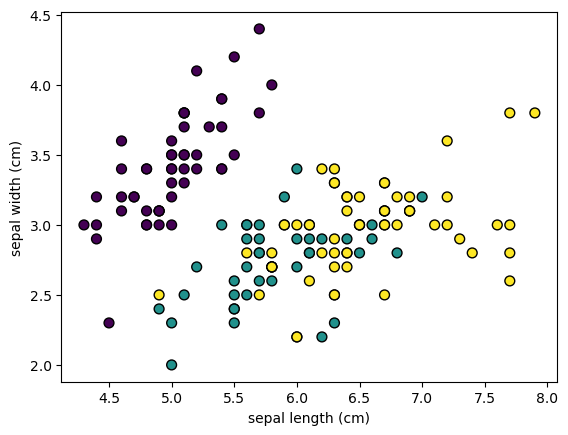

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# fetch dataset 
iris = fetch_ucirepo(id=53)
  
# data (as pandas dataframes) 
X = iris.data.features.iloc[:, :2]
X_1_name = 'sepal length (cm)'
X_2_name = 'sepal width (cm)'
y = np.zeros(150)
y[50:100] = 1
y[100:150] = 2
y_names = iris.data.targets


plt.figure(1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel(X_1_name)
plt.ylabel(X_2_name)
plt.show()
